In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [11]:
train_full = pd.read_csv('train.csv')
test_full = pd.read_csv('test.csv')

In [12]:
def make_numeric(df):
    '''
    Note: this function edits the dataframe in-place
    
    Note: I've only done a few example ones here, to show an outline of how I would approach this.
    '''
    df.PavedDrive = df.PavedDrive == 'Y'
    df.CentralAir = df.CentralAir =='Y'
    df['PavedStreet'] = df.Street == 'Pave'
    del df['Street']
    df['UtilitiesAllPub'] = df.Utilities == 'AllPub'  
    del df['Utilities']
    dummies_HouseStyle = pd.get_dummies(df.HouseStyle,prefix='HouseStyle')
    del dummies_HouseStyle['HouseStyle_1.5Unf'],dummies_HouseStyle['HouseStyle_2.5Fin'],dummies_HouseStyle['HouseStyle_2.5Unf']
    df = pd.concat([df,dummies_HouseStyle],axis=1)
    del df['HouseStyle']
    # Added in example of converting a numerical-type column to classifications;
    df.YrSold = df.YrSold - df.YrSold.min() 
    dummies_YrSold = pd.get_dummies(df.YrSold, prefix='YrSold')
    df = pd.concat([df,dummies_YrSold],axis=1)
    del df['YrSold']
    df.YearBuilt = (df.YearBuilt - df.YearBuilt.min())//10 # split into decades
    dummies_YearBuilt = pd.get_dummies(df.YearBuilt, prefix='YearBuilt')
    df = pd.concat([df,dummies_YearBuilt],axis=1)
    del df['YearBuilt']
    df = df.fillna(0)
    return df

cleaned_train_full = make_numeric(train_full)
cleaned_train_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YearBuilt_4,YearBuilt_5,YearBuilt_6,YearBuilt_7,YearBuilt_8,YearBuilt_9,YearBuilt_10,YearBuilt_11,YearBuilt_12,YearBuilt_13
0,1,60,RL,65.0,8450,0,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,0,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,0,1,0,0,0
2,3,60,RL,68.0,11250,0,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,0,IR1,Lvl,Corner,Gtl,...,1,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,0,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,0


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       ...
       'YearBuilt_4', 'YearBuilt_5', 'YearBuilt_6', 'YearBuilt_7',
       'YearBuilt_8', 'YearBuilt_9', 'YearBuilt_10', 'YearBuilt_11',
       'YearBuilt_12', 'YearBuilt_13'],
      dtype='object', length=102)


<IPython.core.display.Javascript object>


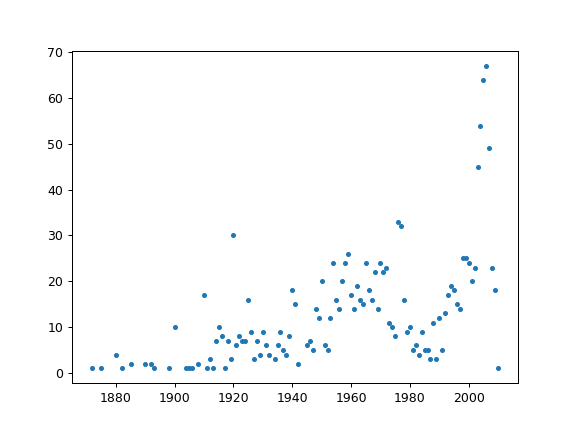

In [13]:
print(cleaned_train_full.columns)
plt.plot(train_full.groupby(train_full.YearBuilt)['YearBuilt'].count(), '.')

In [5]:
cleaned_train_full.isna().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Alley                0
LotShape             0
LandContour          0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
OverallQual          0
OverallCond          0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1         0
                    ..
MoSold               0
SaleType             0
SaleCondition        0
SalePrice            0
PavedStreet          0
UtilitiesAllPub      0
HouseStyle_1.5Fin    0
HouseStyle_1Story    0
HouseStyle_2Story    0
HouseStyle_SFoyer    0
HouseStyle_SLvl      0
YrSold_0             0
YrSold_1   

In [124]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPRegressor as NNReg
#train,test = train_test_split(cleaned_train_full,test_size=0.2)

In [144]:
baseline_model = DTR(max_depth=12, min_samples_leaf=5, min_samples_split=8)
model_RF = AdaBoostRegressor(n_estimators=10000, learning_rate=0.001, base_estimator=baseline_model,loss='square')
#model_BR = BaggingRegressor(n_estimators=5000, warm_start=True, n_jobs=-1, max_samples=0.2)
model_LinReg = LinearRegression()
"""model_NNReg = NNReg(
    hidden_layer_sizes=(100,), 
    activation='relu', 
    solver='lbfgs', 
    alpha=0.0001, 
    batch_size='auto', 
    learning_rate='adaptive', 
    learning_rate_init=0.00001, 
    power_t=0.5, 
    max_iter=100000, 
    shuffle=True, 
    random_state=None, 
    verbose=False, 
    warm_start=False, 
    validation_fraction=0.1)    
"""
target = ['SalePrice']
features = ['LotFrontage', 'LotArea', 'YrSold_0', 'YrSold_1', 'YrSold_2', 
            'YrSold_3', 'YrSold_4', 'UtilitiesAllPub', 'PavedStreet',
            'HouseStyle_1.5Fin', 'HouseStyle_1Story', 'HouseStyle_2Story',
            'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Fireplaces', 'YearBuilt_0', 
            'YearBuilt_1', 'YearBuilt_2', 'YearBuilt_3', 'YearBuilt_4', 'YearBuilt_5', 
            'YearBuilt_6', 'YearBuilt_7', 'YearBuilt_8', 'YearBuilt_9', 'YearBuilt_10', 
            'YearBuilt_11', 'YearBuilt_12', 'YearBuilt_13']

In [145]:
len(features)

29

In [146]:
model_RF.fit(X=train[features],y=train[target])
#model_BR.fit(X=train[features],y=train[target])
model_LinReg.fit(X=train[features],y=train[target])
#model_NNReg.fit(X=train[features],y=train[target])


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
scores = [0,0,0,0]
#scores[0] = model_RF.score(X=test[features], y=test[target])
#cores[1] = model_BR.score(X=test[features], y=test[target])
scores[2] = model_LinReg.score(X=test[features], y=test[target])
scores[3] = model_RF.score(X=test[features], y=test[target])

print(scores)

[0, 0, 0.5269239471617955, 0.5065750844066044]


In [148]:
#plt.figure()
#plt.bar(x=range(len(features)), height=model_RF.feature_importances_,tick_label=features) 

In [149]:
def scoring_met(model):
    preds = model.predict(X=test[features])
    reals = test[target].SalePrice
    return np.mean([(np.abs(preds[i] - j)/j) for i,j in enumerate(reals)])
[scoring_met(model_RF),
scoring_met(model_LinReg)]

[0.1788779557348742, 0.1968825449841243]